In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

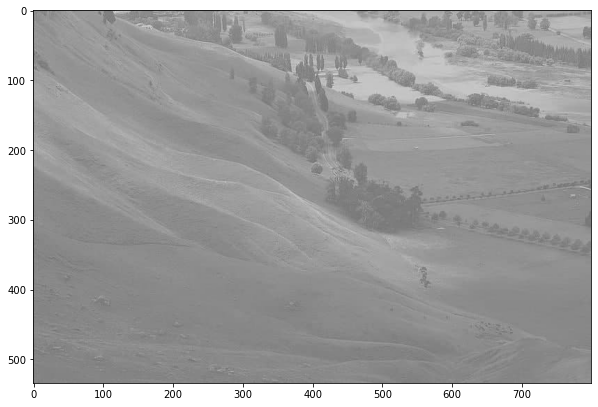

In [3]:
image = cv2.imread("dessert.jpg")
new_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(new_image)
plt.show()

In [4]:
# alternative way to find histogram of an image
img = cv2.imread("dessert.jpg",0)
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))
cv2.imwrite('NEW.jpg',res)

True

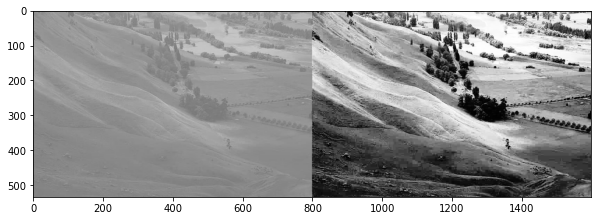

In [5]:
img2=cv2.imread("NEW.jpg")
plt.figure(figsize=(10,10)) # 10, 10: are the width and the height of the 
                            # figure containing the image.
plt.imshow(img2) # Show the image in the figure above.
plt.show() # Show the figure with the image.

# Image transformation by using comulative distribution function

In [6]:
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage import img_as_ubyte, img_as_float
from skimage.exposure import histogram, cumulative_distribution

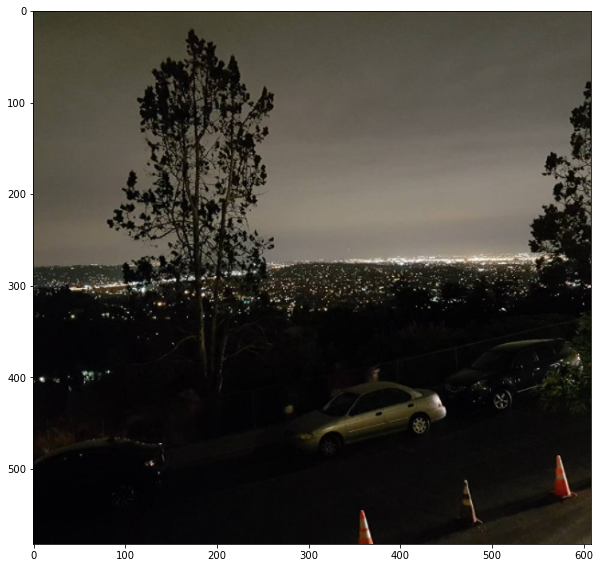

In [20]:
image = cv2.imread("car_img.png")
dark_image_grey=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(dark_image_grey)
plt.show()

extract the image’s value histogram

Text(0, 0.5, 'fraction of pixels')

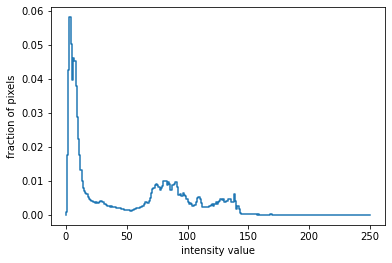

In [28]:
image_dark = imread("car_img.png")
dark_image_intensity = img_as_ubyte(rgb2gray(dark_image_grey))
freq, bins = histogram(dark_image_intensity)
plt.step(bins, freq*1.0/freq.sum())
plt.xlabel("intensity value")
plt.ylabel("fraction of pixels")

(0.0, 1.01)

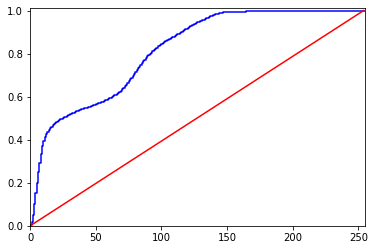

In [35]:
freq, bins = cumulative_distribution(dark_image_grey)
target_bins = np.arange(255)
target_freq = np.linspace(0, 1, len(target_bins))
plt.step(bins, freq, c='b', label='actual cdf')
plt.plot(target_bins, target_freq, c='r', label='target cdf')
plt.xlim(0, 255)
plt.ylim(0, 1.01)

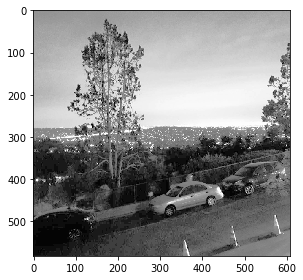

In [37]:
new_vals = np.interp(freq, target_freq, target_bins)
dark_image_eq = img_as_ubyte(new_vals[dark_image_intensity].astype(int))
imshow(dark_image_eq)